## Linear regression using Batch Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Uniformly distributed array with dimension (100, 1)
X = 2 * np.random.rand(100, 1)

# Normally distributed array with noise
y = 4 + 3 * X + np.random.randn(100, 1)

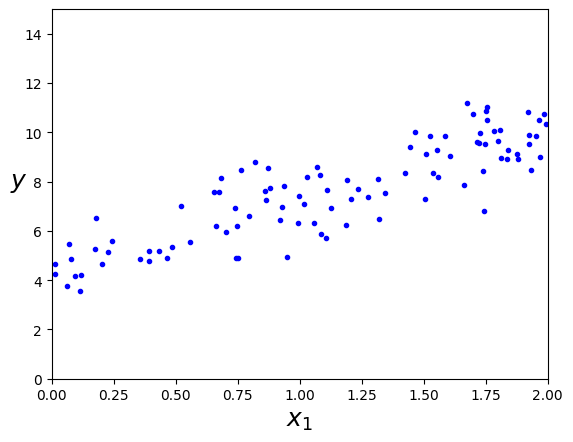

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# Add Bias term x0 = 1
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

X_b

array([[1.        , 0.74689095],
       [1.        , 0.17535431],
       [1.        , 1.92398491],
       [1.        , 0.87283296],
       [1.        , 1.01630749],
       [1.        , 0.74175799],
       [1.        , 0.39216184],
       [1.        , 1.55470845],
       [1.        , 1.96579968],
       [1.        , 1.6761019 ],
       [1.        , 1.80599243],
       [1.        , 1.31900051],
       [1.        , 0.11439981],
       [1.        , 0.07065536],
       [1.        , 0.99256737],
       [1.        , 1.42446536],
       [1.        , 0.09287027],
       [1.        , 0.99747272],
       [1.        , 1.1048585 ],
       [1.        , 0.67427286],
       [1.        , 1.53630896],
       [1.        , 1.72629789],
       [1.        , 1.58579988],
       [1.        , 0.75090769],
       [1.        , 0.8582054 ],
       [1.        , 0.177699  ],
       [1.        , 0.20093483],
       [1.        , 0.43093837],
       [1.        , 0.7960544 ],
       [1.        , 0.87954219],
       [1.

In [ ]:
eta = 0.01 # Learning rate is hyperparameter
n_iterations = 150 # Number of Iterations is hyperparameter
m = 100 # Number of elements in training set
theta = np.random.randn(2,1) # Ramdom initialization of weights

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(theta)

[[ 0.61138143]
 [-0.65618762]]
[[ 0.76601968]
 [-0.45723387]]
[[ 0.91309035]
 [-0.26820702]]
[[ 1.05296806]
 [-0.0886151 ]]
[[1.18600887]
 [0.08200951]]
[[1.31255122]
 [0.24411122]]
[[1.43291677]
 [0.39811247]]
[[1.54741125]
 [0.54441475]]
[[1.65632524]
 [0.68339966]]
[[1.75993494]
 [0.81542989]]
[[1.85850285]
 [0.94085018]]
[[1.95227847]
 [1.05998818]]
[[2.04149896]
 [1.1731553 ]]
[[2.12638972]
 [1.28064754]]
[[2.20716496]
 [1.38274622]]
[[2.28402833]
 [1.47971874]]
[[2.35717334]
 [1.57181923]]
[[2.42678395]
 [1.65928925]]
[[2.49303499]
 [1.74235839]]
[[2.55609264]
 [1.82124485]]
[[2.61611484]
 [1.89615603]]
[[2.67325171]
 [1.96728907]]
[[2.72764594]
 [2.03483132]]
[[2.77943314]
 [2.09896085]]
[[2.82874221]
 [2.15984693]]
[[2.87569566]
 [2.21765043]]
[[2.92040994]
 [2.27252423]]
[[2.96299572]
 [2.32461368]]
[[3.00355821]
 [2.37405688]]
[[3.04219738]
 [2.42098513]]
[[3.07900827]
 [2.46552321]]
[[3.1140812]
 [2.5077897]]
[[3.14750202]
 [2.54789733]]
[[3.17935234]
 [2.58595323]]
[[3.2097

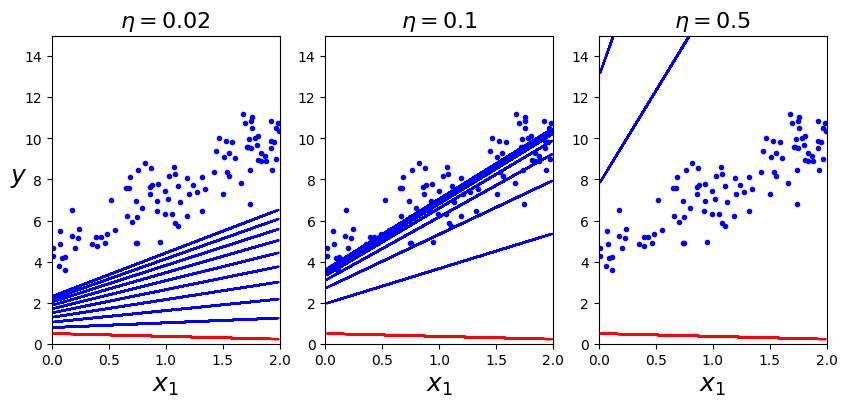

In [ ]:
# Plot Gradient Descent for various learning rates

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

##Stochastic Gradient Descent

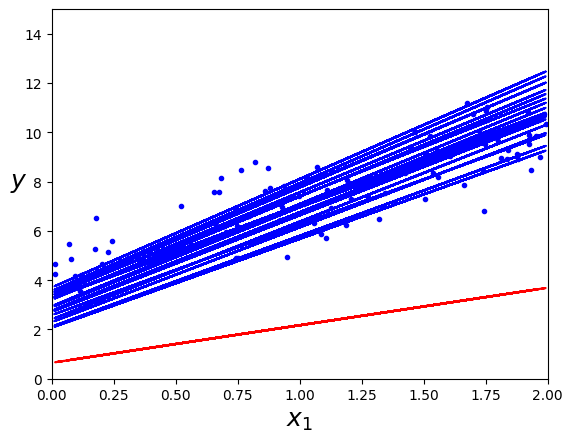

array([[4.37532231],
       [2.92714096]])

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule values

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
theta_path_sgd = []
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

theta

## Mini-Batch Gradient Descent

In [ ]:
# Let's implement Mini-batch gradient descent

theta_path_mgd = []

n_iterations = 50
minibatch_size = 16

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[3.91603345],
       [3.21882762]])

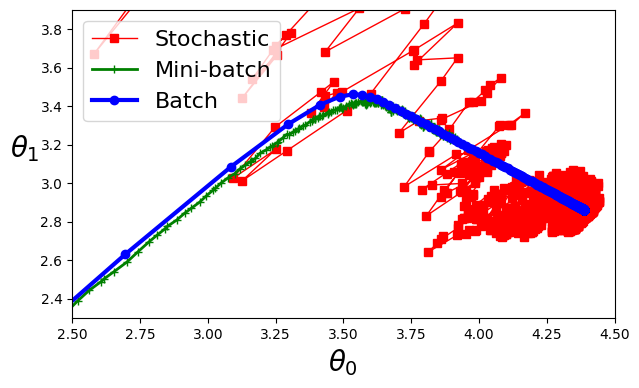

In [ ]:
# Plot paths taken by the three Gradient Descent algorithms during training

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
 def minibatch_iterator(X, y, batch_size):
     """Generates minibatches from the dataset."""
     for i in range(0, len(X), batch_size):
         yield X[i:i + batch_size], y[i:i + batch_size]
# Load the California Housing dataset
 california_housing = fetch_california_housing(as_frame=True)
 df = california_housing.frame

 # Separate features (X) and target (y)
 X = df.drop('MedHouseVal', axis=1)
 y = df['MedHouseVal']

 # Split data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Feature scaling
 scaler = StandardScaler()
 X_train_scaled = scaler.fit_transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # Create the SGDRegressor model
 model = SGDRegressor(
     loss="squared_error",
     penalty="l2",
     alpha=0.0001,
     learning_rate="adaptive",
     eta0=0.01,
     max_iter=1000,
     random_state=42,n_iter_no_change=10)
     #early_stopping=True,



 # Set the batch size
 batch_size = 32

 # Train the model with minibatching
 for epoch in range(model.max_iter):
     for batch_X, batch_y in minibatch_iterator(X_train_scaled, y_train, batch_size):
         model.partial_fit(batch_X, batch_y)

 # Make predictions
 y_pred = model.predict(X_test_scaled)

 # Evaluate the model
 mse = mean_squared_error(y_test, y_pred)
 print(f"Mean Squared Error: {mse}")

NameError: name 'fetch_california_housing' is not defined

In [ ]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.1547727133539123e+20
